# Data Loading

## Training Data Load

In [5]:
import pandas as pd

# Load the data into a dataframe
data_path = "../adult/adult.data"  # Adjust the file path as needed
column_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income",
]
train_df = pd.read_csv(data_path, header=None, names=column_names)
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Load the test data into a dataframe
test_data_path = "../adult/adult.test"  # Adjust the file path as needed
test_df = pd.read_csv(test_data_path, header=None, names=column_names, skiprows=1)

# The test file has a period at the end of every line, which needs to be removed.

test_df['income'] = test_df['income'].str.replace('.', '', regex=False)
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encode the target variable
label_encoder = LabelEncoder()
train_df['income'] = label_encoder.fit_transform(train_df['income']) # Encoded based on classification

X = train_df.drop(columns=['income'])
y = train_df['income']
X = pd.get_dummies(X, drop_first=True)

# Use the entire dataset for training
X_train = X
y_train = y

test_df['income'] = label_encoder.transform(test_df['income'])  # Ensure y_test is encoded

X_test = test_df.drop(columns=['income'])
y_test = test_df['income']
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8527117498925127

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.72      0.61      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281



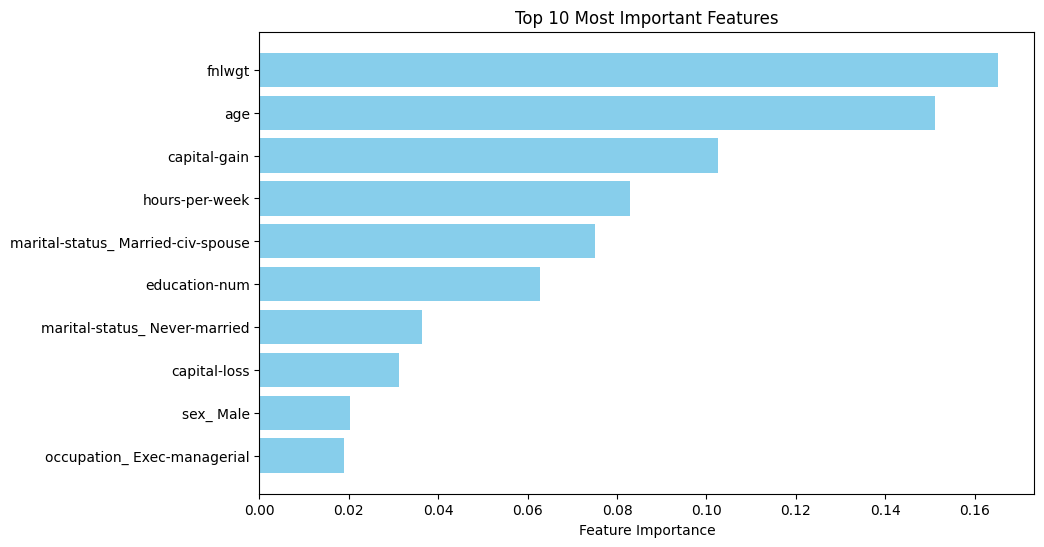

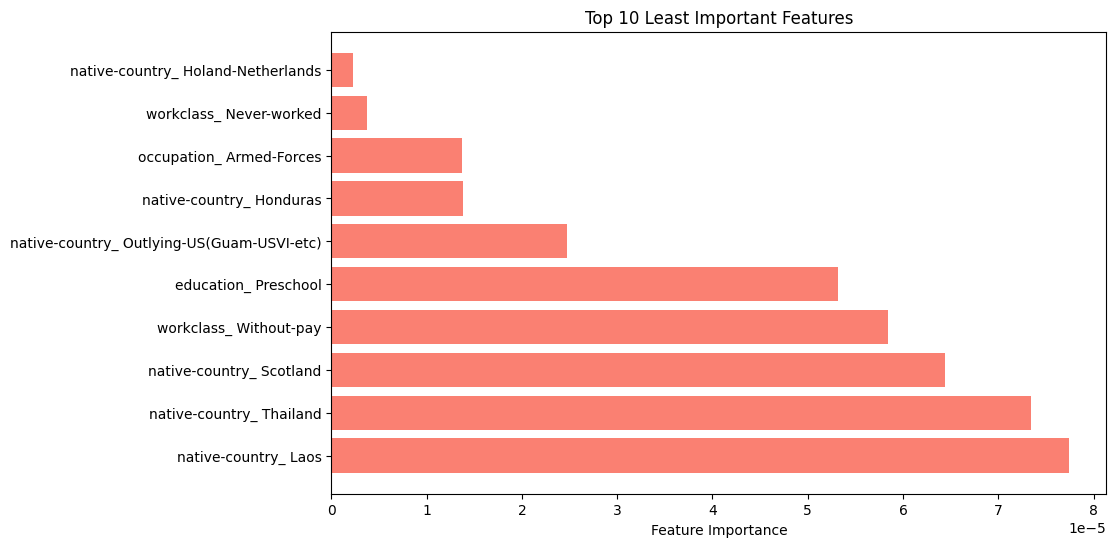

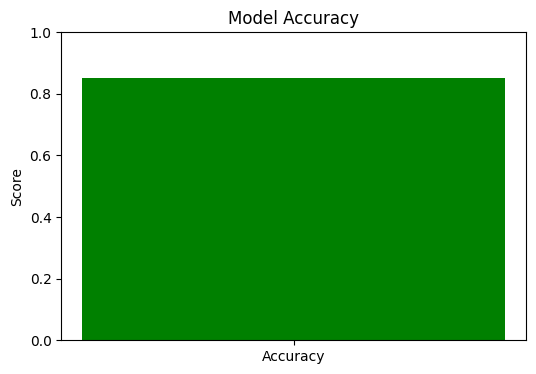

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the classifier
feature_importances = clf.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot the most important features
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10][::-1], sorted_importances[:10][::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.show()

# Plot the least important features
plt.figure(figsize=(10, 6))
plt.barh(sorted_features[-10:], sorted_importances[-10:], color='salmon')
plt.xlabel('Feature Importance')
plt.title('Top 10 Least Important Features')
plt.show()

# Plot accuracy
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='green')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Accuracy')
plt.show()

   Marital Status         Occupation  Average Income
0        Divorced                  ?        0.032432
1        Divorced       Adm-clerical        0.031746
2        Divorced       Craft-repair        0.096983
3        Divorced    Exec-managerial        0.236755
4        Divorced    Farming-fishing        0.078125
..            ...                ...             ...
91        Widowed     Prof-specialty        0.206522
92        Widowed    Protective-serv        0.111111
93        Widowed              Sales        0.190476
94        Widowed       Tech-support        0.105263
95        Widowed   Transport-moving        0.080000

[96 rows x 3 columns]


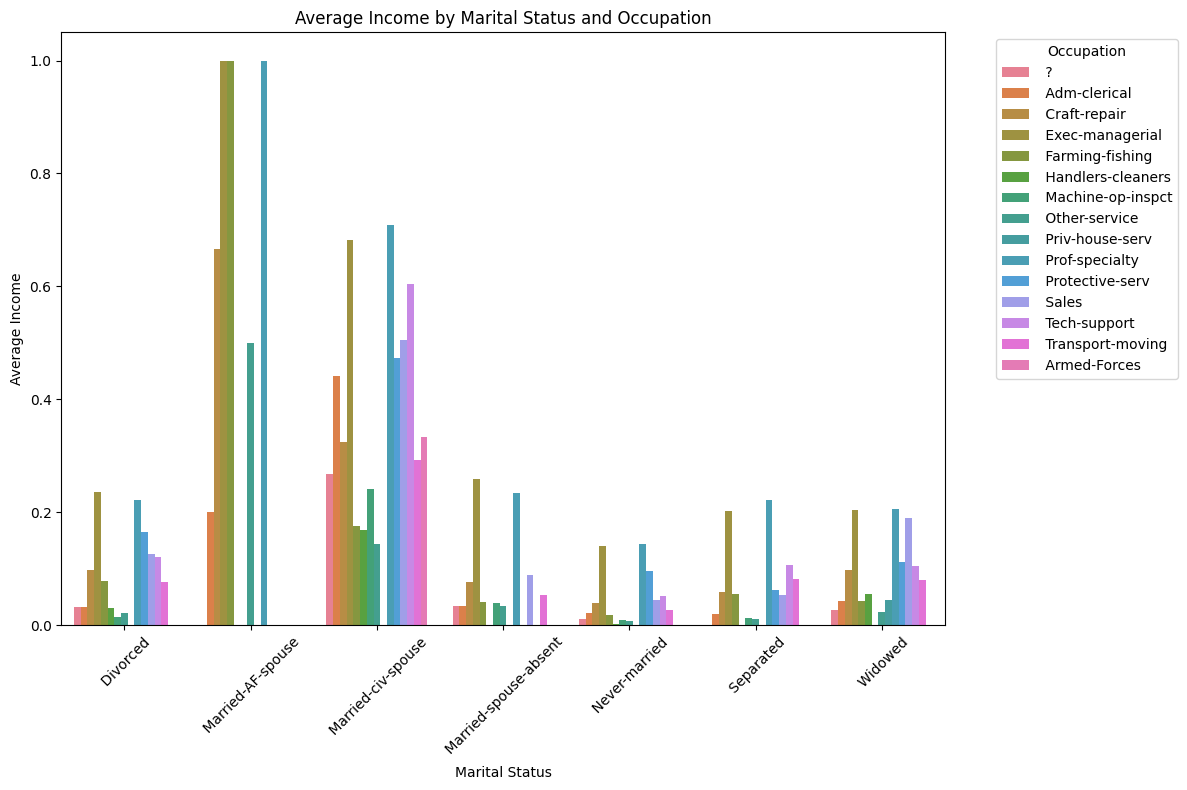

In [ ]:
import seaborn as sns

# Group by marital status and occupation, then calculate the mean income
analysis = train_df.groupby(['marital-status', 'occupation'])['income'].mean().reset_index()

# Rename columns for clarity
analysis.columns = ['Marital Status', 'Occupation', 'Average Income']

# Display the analysis
print(analysis)

plt.figure(figsize=(12, 8))
sns.barplot(data=analysis, x='Marital Status', y='Average Income', hue='Occupation')
plt.xticks(rotation=45)
plt.title('Average Income by Marital Status and Occupation')
plt.ylabel('Average Income')
plt.xlabel('Marital Status')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

MLP Test Accuracy: 0.7952
MLP Train Accuracy: 0.7943

Descriptors:
Number of features: 100
Number of training samples: 32561
Number of test samples: 16281


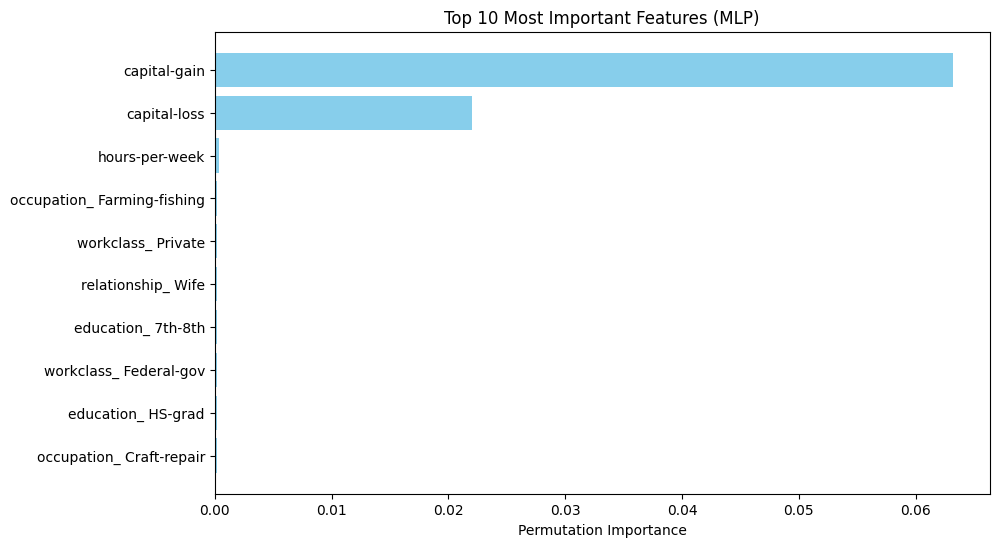

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
import numpy as np

# Train an MLP classifier
mlp_clf = MLPClassifier(
    random_state=42,
    max_iter=1000, 
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    alpha=0.0001
)
mlp_clf.fit(X_train, y_train)

# Get feature importances using permutation importance

perm_importance = permutation_importance(mlp_clf, X_test, y_test, n_repeats=10, random_state=42)

# Sort features by importance
sorted_indices = np.argsort(perm_importance.importances_mean)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = perm_importance.importances_mean[sorted_indices]


mlp_train_accuracy = mlp_clf.score(X_train, y_train)

# Print accuracy comparison
print(f"MLP Test Accuracy: {accuracy_score(y_test, mlp_clf.predict(X_test)):.4f}")
print(f"MLP Train Accuracy: {mlp_train_accuracy:.4f}")

print(f"Number of features: {X_train.shape[1]}")
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")


plt.figure(figsize=(10, 6))
plt.barh(sorted_features[:10][::-1], sorted_importances[:10][::-1], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Top 10 Most Important Features (MLP)')
plt.show()

Simpler MLP Test Accuracy: 0.7987
Simpler MLP Train Accuracy: 0.7975


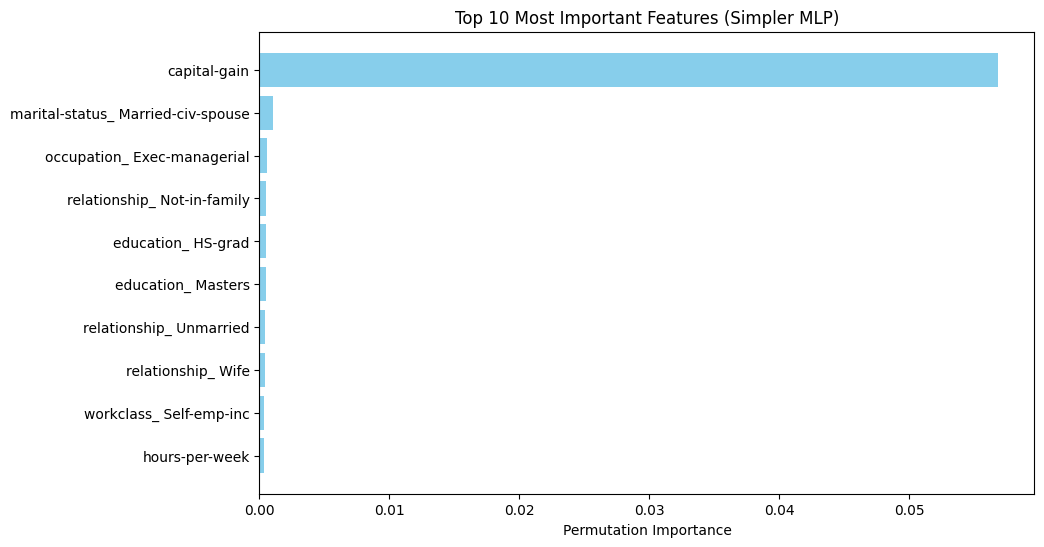

In [ ]:
# Train a simpler MLP classifier
simple_mlp_clf = MLPClassifier(
    random_state=42,
    max_iter=500,  # Reduced iterations
    hidden_layer_sizes=(50,),  # Single hidden layer with fewer neurons
    activation='relu',
    solver='adam',
    learning_rate='constant',
    alpha=0.01  # Increased regularization
)
simple_mlp_clf.fit(X_train, y_train)

# Get feature importances using permutation importance
simple_perm_importance = permutation_importance(simple_mlp_clf, X_test, y_test, n_repeats=5, random_state=42)

simple_sorted_indices = np.argsort(simple_perm_importance.importances_mean)[::-1]
simple_sorted_features = X.columns[simple_sorted_indices]
simple_sorted_importances = simple_perm_importance.importances_mean[simple_sorted_indices]

# Evaluate the simpler MLP classifier
simple_mlp_train_accuracy = simple_mlp_clf.score(X_train, y_train)
simple_mlp_test_accuracy = accuracy_score(y_test, simple_mlp_clf.predict(X_test))

print(f"Simpler MLP Test Accuracy: {simple_mlp_test_accuracy:.4f}")
print(f"Simpler MLP Train Accuracy: {simple_mlp_train_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(simple_sorted_features[:10][::-1], simple_sorted_importances[:10][::-1], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Top 10 Most Important Features (Simpler MLP)')
plt.show()

Gradient Boosting Classifier Accuracy: 0.8227381610466188

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     12435
           1       0.71      0.42      0.53      3846

    accuracy                           0.82     16281
   macro avg       0.78      0.68      0.71     16281
weighted avg       0.81      0.82      0.81     16281



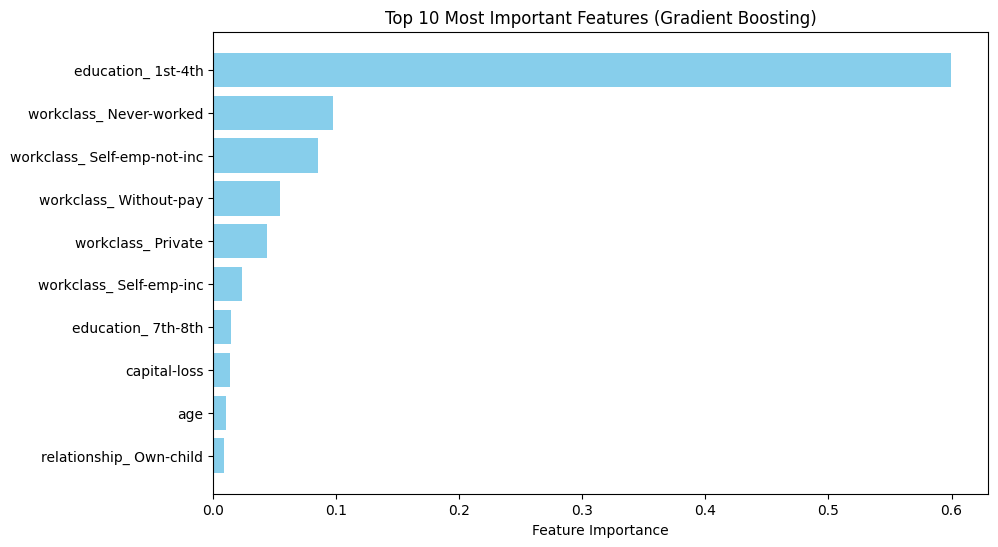

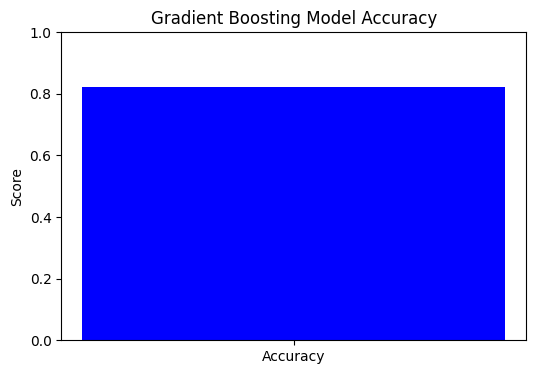

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
# Focus only on marital status, native country, and relationship as features
selected_features = [col for col in X.columns if any(prefix in col for prefix in ['marital-status_', 'relationship_', 'education_', 'native-country_'])]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Gradient Boosting Classifier with the selected features
gb_clf.fit(X_train_selected, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(X_test_selected)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# Get feature importances
feature_importances_gb = gb_clf.feature_importances_
sorted_indices_gb = feature_importances_gb.argsort()[::-1]
sorted_features_gb = X.columns[sorted_indices_gb]
sorted_importances_gb = feature_importances_gb[sorted_indices_gb]

# Plot the most important features
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_gb[:10][::-1], sorted_importances_gb[:10][::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features (Gradient Boosting)')
plt.show()

# Plot accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy_gb], color='blue')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Gradient Boosting Model Accuracy')
plt.show()
